# Problem : The Mall's marketing team wants to push promotions and scubsciptions for specific customers who regularly visit thier stores. Using clustering analysis, create prospective Subscription strategies for the marketing team and generate lead scores accordingly

# Preliminary Analysis

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import os
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
os.chdir(r'C:\Users\ARSHAN\Downloads')
df=pd.read_csv('Mall_Customers.csv')
print(df.head(),df.shape)


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40 (200, 5)


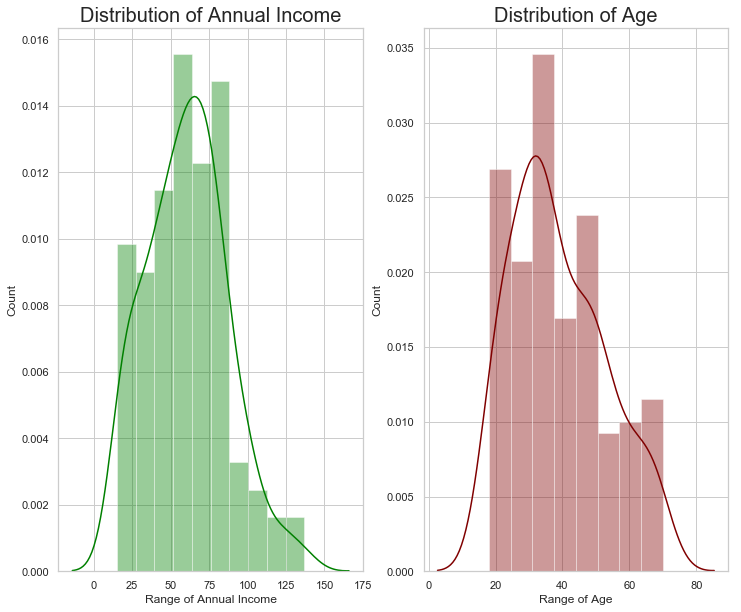

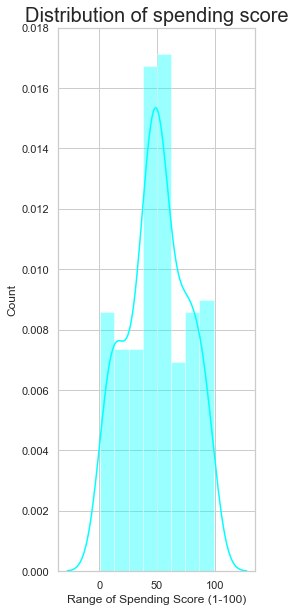

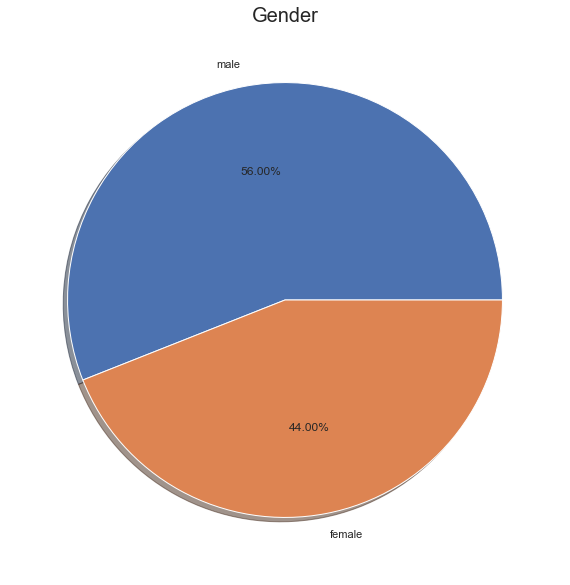

In [24]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (12, 10)
plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(df['Annual Income (k$)'],color='Green')
plt.title('Distribution of Annual Income', fontsize = 20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(df['Age'], color = 'Maroon')
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()

plt.subplot(1, 3, 1)
sns.set(style = 'whitegrid')
sns.distplot(df['Spending Score (1-100)'], color = 'Aqua')
plt.title('Distribution of spending score', fontsize = 20)
plt.xlabel('Range of Spending Score (1-100)')
plt.ylabel('Count')
plt.show()

Labels=['male','female']

plt.pie(df['Gender'].value_counts(),labels=Labels,shadow=True,autopct = '%.2f%%')
plt.title('Gender',fontsize=20)
plt.show()

Here we can interpret the following points from the above distribution plots

1) Least income is around 20k dollars

2) most people have income from 45k - 85k USD (approx)

3) few people earn more than 100k USD

4) People of ages 25-40 are most visitors in the Mall

5) most people have a spending score ranging from 35-65 points

6) the percentage of males and females are almost the same considering the amount of data we have (200), hence we can ignore the gender

variable in our analysis

Hence 2 important variables in our analysis are 'Age and Income'

Age vs Spending Score analysis

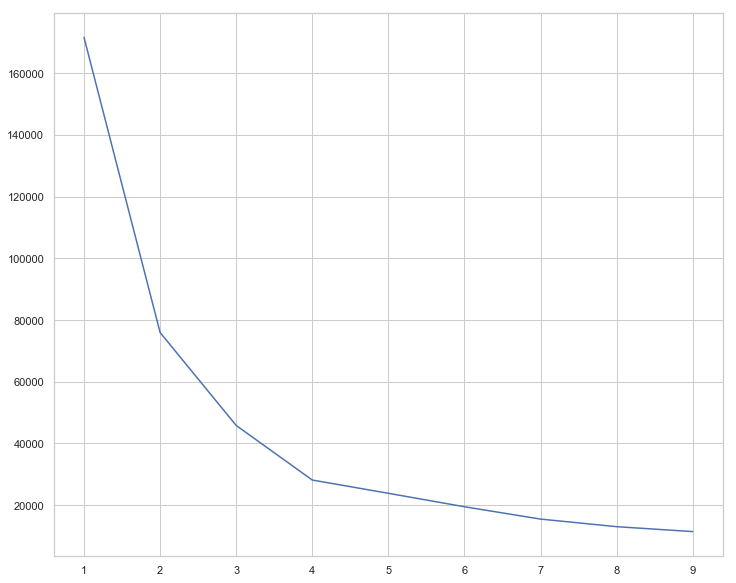

In [4]:
#elbow mthod to find ideal k
k_rng = range(1,10)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[['Age','Spending Score (1-100)']])
    sse.append(km.inertia_)
x=plt.plot(k_rng,sse)
x

Using the Elbow method we can conclude that k should be 4 

In [5]:
km=KMeans(n_clusters=4)
y=km.fit_predict(df[['Age','Spending Score (1-100)']])
df['cluster']=y
df['cluster'].unique()

array([2, 1, 3, 0], dtype=int64)

In [6]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
df4=df[df.cluster==3]


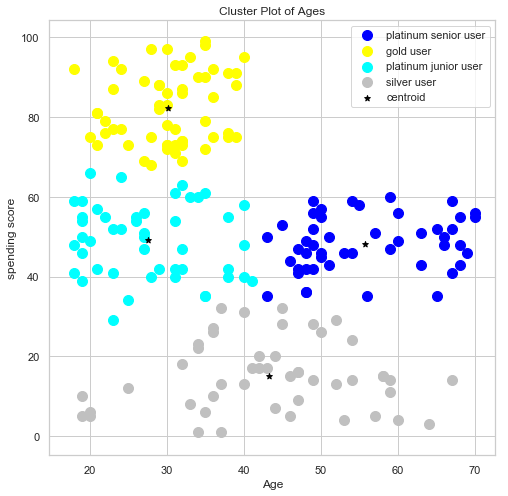

In [11]:
plt.scatter(df1.Age,df1['Spending Score (1-100)'],s=100,color='blue',label='platinum senior user')
plt.scatter(df2.Age,df2['Spending Score (1-100)'],s=100,color='yellow',label='gold user')
plt.scatter(df3.Age,df3['Spending Score (1-100)'],s=100,color='cyan',label='platinum junior user')
plt.scatter(df4.Age,df4['Spending Score (1-100)'],s=100,color='silver',label='silver user')
plt.rcParams['figure.figsize'] = (8, 8)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*',label='centroid')
plt.title('Cluster Plot of Ages')
plt.xlabel('Age')
plt.ylabel('spending score')
plt.legend()

In [12]:
#totol number of Important data points
print(df1['Age'].value_counts().sum())
print(df2['Age'].value_counts().sum())
print(df3['Age'].value_counts().sum())
print(df4['Age'].value_counts().sum())

48
57
47
48


Using Age as a factor we can suggest the marketing team to create strategies for the following 3 group which consists a total of 143 customers

1) elderly Target customers - 48

2) Target customers (Young) - 48

3) Priority Customers - 47

4) Regular Users -57

we can further extract all data points and classify them as Platinum Senior User, Silver User, Gold User and Platinum Junior User

In [13]:
priority1=['Platinum Senior User']*48
priority2=['Gold User']*57
priority3=['Platinum Junior User']*47
priority4=['Silver User']*48
df1['Status']=priority1
df2['Status']=priority2
df3['Status']=priority3
df4['Status']=priority4
final1=[df1,df2,df3,df4]
final1=pd.concat(final1)
final1.drop('cluster',axis=1)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Status
40,41,Female,65,38,35,Platinum Senior User
42,43,Male,48,39,36,Platinum Senior User
46,47,Female,50,40,55,Platinum Senior User
50,51,Female,49,42,52,Platinum Senior User
53,54,Male,59,43,60,Platinum Senior User
54,55,Female,50,43,45,Platinum Senior User
55,56,Male,47,43,41,Platinum Senior User
56,57,Female,51,44,50,Platinum Senior User
57,58,Male,69,44,46,Platinum Senior User
59,60,Male,53,46,46,Platinum Senior User


Income vs Spending Score Analysis

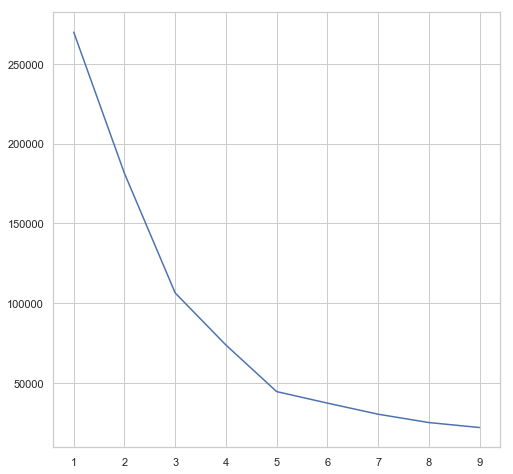

In [14]:
k_rng = range(1,10)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    sse.append(km.inertia_)
x=plt.plot(k_rng,sse)
x

In [15]:
#using elbow method k is 5
km=KMeans(n_clusters=5)
y=km.fit_predict(df[['Annual Income (k$)','Spending Score (1-100)']])
df['cluster']=y
df['cluster'].unique()

array([3, 1, 0, 2, 4], dtype=int64)

In [16]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
df4=df[df.cluster==3]
df5=df[df.cluster==4]
df4.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,3
2,3,Female,20,16,6,3
4,5,Female,31,17,40,3
6,7,Female,35,18,6,3
8,9,Male,64,19,3,3


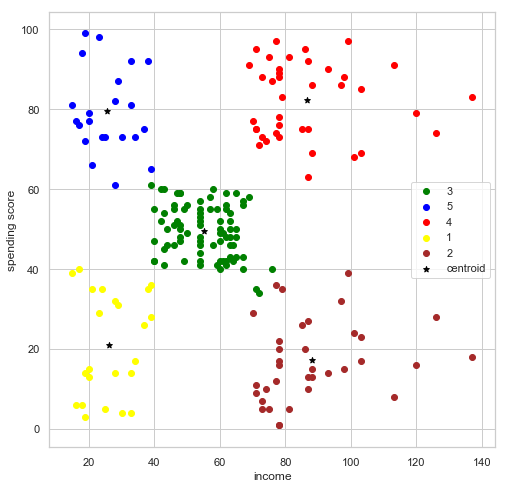

In [17]:
plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],color='green',label='3')
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],color='blue',label='5')
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],color='red',label='4')
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'],color='yellow',label='1')
plt.scatter(df5['Annual Income (k$)'],df5['Spending Score (1-100)'],color='Brown',label='2')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*',label='centroid')
plt.xlabel('income')
plt.ylabel('spending score')
plt.legend()

In [18]:
print(df1['Annual Income (k$)'].value_counts().sum())
print(df2['Annual Income (k$)'].value_counts().sum())
print(df3['Annual Income (k$)'].value_counts().sum())
print(df4['Annual Income (k$)'].value_counts().sum())
print(df5['Annual Income (k$)'].value_counts().sum())

81
22
39
23
35


we can see that there seems to be no definite relationship between spending score and income . we can interpret this as

1) people with high and low income can both spend lavishly as well as can restrict themselves to limited buying (clusters 1,2,4 & 5)

2) certain people have a calculated approach towards spending in malls (cluster 3)

hence we can classify these subgroups to a 'spending behaviour' category the marketing team will create startegies accordingly

1) indigent - yellow cluster (1)

2) stingy - brown cluster (2)

3) extravagant - red cluster (5)

4) Prodigal - blue cluster (4)

5) economical - green cluster (3)

In [19]:
s1=['econmical']*81
s2=['prodigal']*22
s3=['extravagant']*39
s4=['indigent']*23
s5=['stingy']*35
df1['Spending Behaviour']=s1
df2['Spending Behaviour']=s2
df3['Spending Behaviour']=s3
df4['Spending Behaviour']=s4
df5['Spending Behaviour']=s5
final2=[df1,df2,df3,df4,df5]
final2=pd.concat(final2)
final2.drop('cluster',axis=1)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Spending Behaviour
43,44,Female,31,39,61,econmical
46,47,Female,50,40,55,econmical
47,48,Female,27,40,47,econmical
48,49,Female,29,40,42,econmical
49,50,Female,31,40,42,econmical
50,51,Female,49,42,52,econmical
51,52,Male,33,42,60,econmical
52,53,Female,31,43,54,econmical
53,54,Male,59,43,60,econmical
54,55,Female,50,43,45,econmical


for the sake of convenience and simplicity, lets export the 2 files to excel format and concatenate them in excel into 1 file with non overlapping observations, this can also be done in python code using pandas append method or using joins in SQL server . 

In [28]:
final1.to_excel(r'C:\Users\ARSHAN\Desktop\Data science Projects\final1.xls', index = False)

In [29]:
final2.to_excel(r'C:\Users\ARSHAN\Desktop\Data science Projects\final2.xls', index = False)

In [3]:
#after concatenation 

final = pd.read_csv(r'final.csv')
final.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Spending Behaviour,Status
55,56,Male,47,43,41,econmical,Platinum Senior User
148,149,Female,34,78,22,stingy,Silver User
43,44,Female,31,39,61,econmical,Platinum Junior User
79,80,Female,49,54,42,econmical,Platinum Senior User
49,50,Female,31,40,42,econmical,Platinum Junior User


Let us now solve do some ordinal encoding to generate a lead score for prospective customer for which the marketing team can push promotions

In [4]:
# ranking
spendrank = {'indigent':1,
             'prodigal':4,
             'econmical':3,
             'stingy':2, 
             'extravagant':5
}
statusrank={"Silver User":1,
            "Platinum Junior User":2,
            "Platinum Senior User":3,
            "Gold User":4
}

In [5]:
final['spending behavior rank']= final['Spending Behaviour'].map(spendrank)

final['Status rank']= final['Status'].map(statusrank)
final.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Spending Behaviour,Status,spending behavior rank,Status rank
0,1,Male,19,15,39,indigent,Platinum Junior User,1,2
1,2,Male,21,15,81,prodigal,Gold User,4,4
2,3,Female,20,16,6,indigent,Silver User,1,1
3,4,Female,23,16,77,prodigal,Gold User,4,4
4,5,Female,31,17,40,indigent,Platinum Junior User,1,2


In [6]:
final['Spending Behaviour'].unique()

array(['indigent', 'prodigal', 'econmical', 'extravagant', 'stingy'],
      dtype=object)

In [7]:
final['Lead Score']=final['spending behavior rank']+final['Status rank']
final['Lead Score'].unique()


array([3, 8, 2, 6, 4, 5, 9, 7], dtype=int64)

In [8]:
final.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Spending Behaviour,Status,spending behavior rank,Status rank,Lead Score
0,1,Male,19,15,39,indigent,Platinum Junior User,1,2,3
1,2,Male,21,15,81,prodigal,Gold User,4,4,8
2,3,Female,20,16,6,indigent,Silver User,1,1,2
3,4,Female,23,16,77,prodigal,Gold User,4,4,8
4,5,Female,31,17,40,indigent,Platinum Junior User,1,2,3


In [9]:
columns=['spending behavior rank','Status rank']
final=final.drop(columns,axis=1)
final=final.rename(columns={'Status':'Subscription Status'})
final=final.rename(columns={'Lead Score':'Lead Score(1-10)'})
final.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Spending Behaviour,Subscription Status,Lead Score(1-10)
0,1,Male,19,15,39,indigent,Platinum Junior User,3
1,2,Male,21,15,81,prodigal,Gold User,8
2,3,Female,20,16,6,indigent,Silver User,2
3,4,Female,23,16,77,prodigal,Gold User,8
4,5,Female,31,17,40,indigent,Platinum Junior User,3


Final Reports and Visuals

In [10]:
print(final['Spending Behaviour'].value_counts().unique)
print(final['Subscription Status'].value_counts().unique)

<bound method Series.unique of econmical      81
extravagant    39
stingy         35
indigent       23
prodigal       22
Name: Spending Behaviour, dtype: int64>
<bound method Series.unique of Gold User               57
Platinum Senior User    48
Silver User             48
Platinum Junior User    47
Name: Subscription Status, dtype: int64>


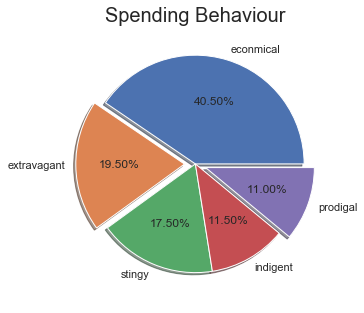

In [12]:
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (5,5)
sns.set(style = 'whitegrid')
Labels=['econmical','extravagant','stingy','indigent','prodigal']
explode = (0, 0.1, 0, 0,0.1)
plt.pie(final['Spending Behaviour'].value_counts(),explode=explode,labels=Labels,shadow=True,autopct = '%.2f%%')
plt.title('Spending Behaviour',fontsize=20)
plt.show()

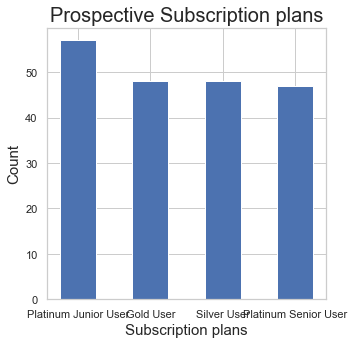

In [13]:
plt.subplot(1, 1, 1)
plt.bar(final['Subscription Status'].unique(),final['Subscription Status'].value_counts(),width=0.5)
plt.title('Prospective Subscription plans', fontsize = 20)
plt.xlabel('Subscription plans',fontsize = 15)
plt.ylabel('Count',fontsize = 15)
plt.show()

Conclusion : 
We have finally been able to make the lives off the marketing team a little easier by creating prospective subscription startegies and lead scores for existing customers. The marketing team can now push promotions or upgradations to this customers based on the data which we have
Note : T
his particular notebook contains very little data preprocessing and more of data segmentation. ALL of this can also be done in MS excel, MY Objective was to show how companies create marketing strategies and distributions channels using clustering technique and this notebook gives you a jist of that. Please share your feedback as it is valuable.